## MTH 9875 The Volatility Surface:    Fall 2015

<p>

### Lecture 6: Characteristic function methods, models with jumps


Jim Gatheral   
Department of Mathematics   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/BaruchLogo2.png" align = "left" width=160></h3>    

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/MFElogo.png" align = "right" width=100></h3>

### Outline of lecture

* Motivation for jumps

* Derivation of the valuation equation under jump-diffusion

* Characteristic function methods

* Lévy processes and the Lévy-Khintchine formula

* Characteristics of the volatility surface under jump-diffusion

* Default modeled as jump-to-ruin

* Capital structure arbitrage

### Jumps

- We already saw in Lecture 5 that the Heston model generates a volatility surface that looks very different from the empirical one for short expirations.


-  The conventional solution is to introduce jumps.  In this lecture, we will motivate this modeling choice.

- We will see that introducing jumps has very little effect on the shape of the volatility surface for longer-dated options; the impact on the shape of the volatility surface is all at the short-expiration end.  

    -  Thus, stochastic volatility and jump parameters may be robustly calibrated to the empirical volatility surface.


- We conclude by showing that the volatility smile for single-stock options is very sensitive to default risk.

### Option prices as of the close on September 15, 2005

<p>

<div align="center">Table 1: September 2005 expiration option prices as of the close on September 15, 2005. Triple witching is the following day. SPX is trading at 1227.73.
<p>

Strike$~~~~~~$|$~~~~~~$Call Bid|$~~~~~~$Call Ask|$~~~~~~$Put Bid|$~~~~~~$Put Ask
:------|------:|--------:|------:|------:
1160 | 66.70 | 68.70 | 0.05 | 0.25
1170 | 56.70 | 58.70 | 0.05 | 0.35
1175 | 51.70 | 53.70 | 0.05 | 0.10
1180 | 46.70 | 48.70 | 0.10 | 0.30
1190 | 36.70 | 38.70 | 0.10 | 0.15
1195 | 31.70 | 33.70 | 0.05 | 0.20
1200 | 26.70 | 28.70 | 0.15 | 0.25
1205 | 21.70 | 23.70 | 0.25 | 0.30
1210 | 16.80 | 18.60 | 0.30 | 0.40
1215 | 11.90 | 13.70 | 0.30 | 0.45
1220 | 8.00 | 8.80 | 0.65 | 0.75
1225 | 3.90 | 4.20 | 1.10 | 1.90
1230 | 1.50 | 2.00 | 2.80 | 4.20
1235 | 0.35 | 0.50 | 6.70 | 8.30
1240 | 0.15 | 0.25 | 11.40 | 13.20
1245 | 0.15 | 0.70 | 16.40 | 18.00
1250 | 0.05 | 0.10 | 21.30 | 22.70

### Why models have jumps

* We indicated earlier the possibility that jumps might be used to explain why the skew is so steep for very short expirations.


* Another indication that jumps might be useful to explain the volatility surface comes from Table 1. There, we see that there is a 5 cent bid for a 1160 put which is over 67 points out-of-the-money expiring the following morning.

### Inconsistency with diffusion

* Historically, about 40% of the variance of SPX is from overnight moves and the at-the-money volatility at the time was about $10\%$.

    * With these parameters, a 67 point move corresponds to around 13.7 standard deviations.


* The probability of a normally distributed variable making such a move is zero (to about forty decimal places).

    * And these 5 cent bids are only bids; one might suppose that actual trades would take place somewhere between the bid and the offer.

* Similarly, there is a 5 cent bid for a call struck at 1250, about 23 points out-of-the-money.

    *  That’s only about 4.7 standard deviations but even the probability of a normally distributed variable making that much smaller move is only just over one in a million. 


* Diffusions just can’t generate the size of moves over very short
timescales that would be required to justify such option prices.</span>

### Short-covering as an explanation

* High bids for options that would require an extreme move to end up in-the-money reflect the extreme short-end smile in the SPX market just prior to expiration.


* From the perspective of a trader, the explanation is straightforward: large moves do sometimes occur and it makes economic sense to bid for out-of-the-money options – at the very least to cover existing risk.


* A similar explanation points out that a position of short very out-of-the-money options requires margin.  Covering the short fixes this.

### Very short expiration volatility smile

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/10/9875-6.zip", destfile="9875-6.zip")
unzip(zipfile="9875-6.zip")

source("BlackScholes.R")
source("Heston2.R")
source("plotIvols.R")

Load option volatility data from 15-Sep-2005

In [2]:
load("spx050915.rData")

Here's the pre-cooked SVI fit again:

In [3]:
texp <- sort(unique(spxOptData$Texp));

svidata <- c(
 c(-0.0001449630, 0.0092965440, 0.0196713280, -0.2941176470,-0.0054273230),
 c(-0.000832134	, 0.024439766 , 0.069869455 , -0.299975308 , 0.02648364  ), 
 c(-0.0008676750, 0.0282906450, 0.0873835580, -0.2892204290, 0.0592703000), 
 c(-0.0000591593, 0.0331790820, 0.0812872370, -0.3014043240, 0.0652549210),
 c(0.0011431940	, 0.0462796440, 0.1040682980, -0.3530782140, 0.0942000770), 
 c(0.0022640980	, 0.0562604150, 0.1305339330, -0.4387409470, 0.1111230690), 
 c(0.0040335530	, 0.0733707550, 0.1707947600, -0.4968970370, 0.1496609160), 
 c(0.0034526910	, 0.0917230540, 0.2236814130, -0.4942213210, 0.1854128490));

sviMatrix <- as.data.frame(t(array(svidata,dim=c(5,8))));
colnames(sviMatrix)<-c("a","b","sig","rho","m")

# Extract first expiration (less than one day)
t1 <- texp[1];
spxOptData1 <- spxOptData[spxOptData$Texp==t1,];

### Heston short-dated smile is relatively flat

In Figure 1, we plot observed implied volatilities and the SVI fit together with the implied volatility smile generated by the Heston model with Sep05 SPX parameters from Table 3 of Lecture 5:

$$v  = 0.0174;\,
\bar v  =  0.0354;\,
\eta = 0.3877;\,
\rho  =  -0.7165;\,
\lambda  =1.3253;\,$$

In [4]:
paramsHeston050915 <- list(
  v= 0.0174,
  vbar=0.0354,
  eta=0.3877,
  rho=-0.7165,
  lambda=1.3253)

# Draw the smile
k <- seq(-.1,.1,0.001) # Vector of log-strikes
vol1 <- function(k){impvolHeston(paramsHeston050915)(k,t1)}
volHeston <- function(k){sapply(k,function(k){vol1(k)})}
volH <- volHeston(k)

ERROR: Error in vol(x): could not find function "svi"


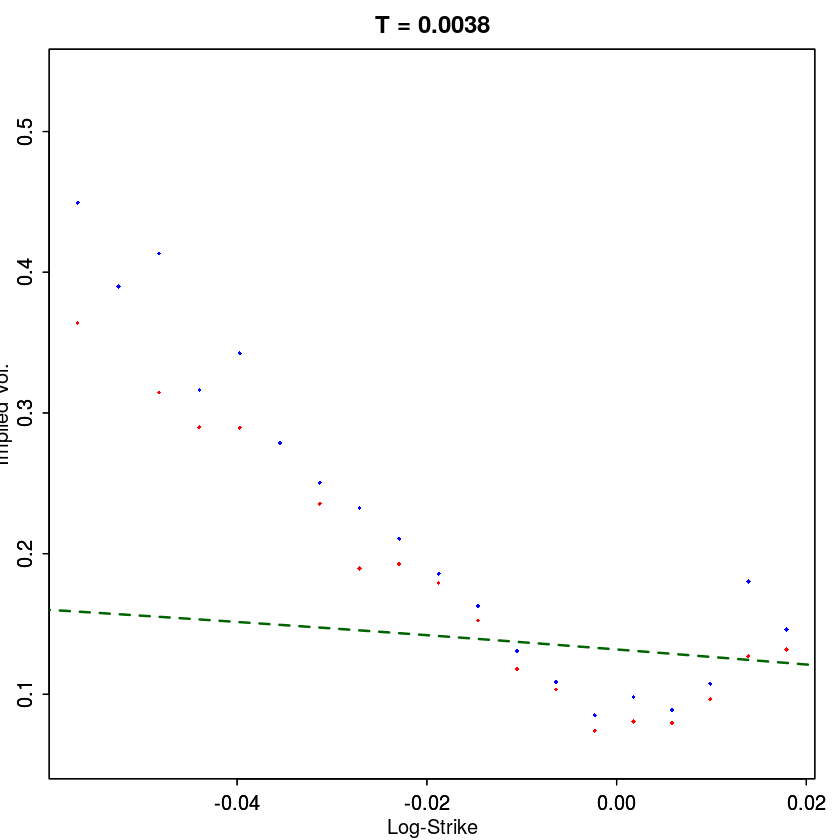

In [5]:
plotIvols(spxOptData1,sviMatrix[1,])
points(k,volH,col="dark green", lty=2,type="l",lwd=2)

Figure 1: Graph of the September 16, 2005 expiration volatility smile as of the close on September 15, 2005. SPX is trading at 1227.73. Red and blue lines are bids and offers. The orange line is an SVI fit to the data. The dashed dark green line represents the Heston skew with Sep05 SPX parameters.

* Note in particular that the Heston smile is flat and completely inconsistent with the empirically observed smile.


* Extreme very short-end skews are incompatible with stochastic volatility

    * If the underlying process is a diffusion and volatility of volatility is reasonable, volatility should be near constant on timescale that is much shorter than the half-life of the volatility process.

    * For very short times, returns should be roughly normally distributed and the skew should be quite flat.

### Extreme volatility of volatility works better

Now increase the volatility from $0.39$ to $10$, obviously a very extreme choice.

In [6]:
paramsHeston050915adj <- list(
  v= 0.0174,
  vbar=0.0354,
  eta=10,
  rho=-0.7165,
  lambda=1.3253)

# Draw the smile
k <- seq(-.1,.1,0.001) # Vector of log-strikes
vol1 <- function(k){impvolHeston(paramsHeston050915adj)(k,t1)}
volHeston <- function(k){sapply(k,function(k){vol1(k)})}
volH <- volHeston(k)

ERROR: Error in vol(x): could not find function "svi"


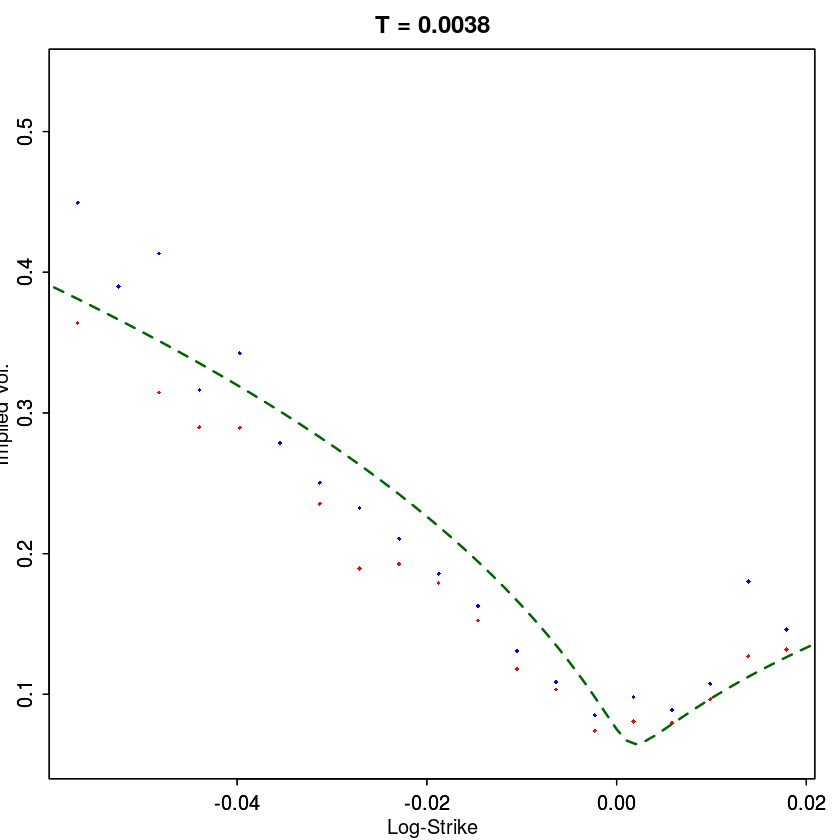

In [7]:
plotIvols(spxOptData1,sviMatrix[1,])
points(k,volH,col="dark green", lty=2,type="l",lwd=2)

### Derivation of the jump-diffusion valuation equation

Following [Wilmott]<sup id="cite_ref-Wilmott" class="reference"><a href="#cite_note-Wilmott"><span>[</span>4<span>]</span></a></sup>, we assume the stock price follows the SDE

<a name="eq:stockprocess"></a>(1)
$$dS_t = \mu  \,S_t\, dt + \sigma\, S_t\, dZ_t +(J-1)\,S_t\,dq_t$$

with $\sigma$ constant and where the Poisson process 

$$dq_t=
\left\{ {\begin{array}{*{10}l}
   &0&\textrm{ with probability }1- \lambda(t)\, dt  \\
   &1&\textrm{ with probability } \lambda(t) \, dt \\
\end{array}}
\right.$$ 

When $dq_t=1$, the process jumps from $S_t$ to $J\,S_t$.

* We assume that the jump arrival rate $\lambda(t)$ is independent of the stock price process.

### Case of known jump size

* As in the stochastic volatility case, we derive a valuation equation by considering the hedging of a contingent claim.

    * We make the (unrealistic) assumption at this stage that the jump size $J$ is known in advance.


* Whereas in the stochastic volatility case, the second risk factor to be hedged was the random volatility, in this case, the second factor is the jump.

* So once again, we set up a portfolio $\Pi$ containing the option being priced whose value we denote by $V(S,v,t)$, a quantity $-\Delta$ of the stock and a quantity $-\Delta_1$ of another asset whose value $V_1$ also depends on the jump.

We have 

$$\Pi  = V - \Delta \,S - \Delta _1 \,V_1$$ 

The change in this
portfolio in the time interval $dt$ is given by

\begin{eqnarray*}
d\Pi &=& \left\{ {\frac{{\partial V}}{{\partial t}} +
\frac{1}{2}\sigma^2\,S^2 \frac{{\partial ^2 V}}{{\partial S^2 }}}
\right\}dt  \\
&&- \Delta _1 \left\{ {\frac{\partial V_1 }{\partial t}
+ \frac{1}{2}\sigma^2\,S^2}\frac{{\partial ^2
V_1 }}{{\partial S^2 }} \right\}dt \nonumber\\
&& + \left\{ {\frac{{\partial V}}{{\partial S}} - \Delta _1
\frac{{\partial V_1 }}{{\partial S}} - \Delta } \right\}dS^c
\nonumber\\
&& + \{V(JS,t)-V(S,t)\nonumber\\
&& -\Delta_1 (V_1(JS,t)-
V_1(S,t)) -\Delta (J-1) S\}\,dq
\end{eqnarray*}

where $S^c_t$ is the continuous part of $S_t$ (adding back all the
jumps that occurred up to time $t$).

### Hedge underlying and the jump

To make the portfolio instantaneously risk-free, we must choose

$$\frac{{\partial V}}{{\partial S}} - \Delta _1 \frac{{\partial V_1
}}{{\partial S}} - \Delta  = 0$$ 

to eliminate $dS$ terms, and

$$V(JS,t)-V(S,t)-\Delta_1 (V_1(JS,t)- V_1(S,t)) -\Delta (J-1) S = 0$$ 

to eliminate $d q $ terms.

This leaves us with

\begin{eqnarray*}
d \Pi &=& \left\{ {\frac{{\partial V}}{{\partial t}} +
\frac{1}{2}\sigma^2\,S^2 \frac{{\partial ^2 V}}{{\partial S^2 }}}
 \right\}dt  \\&&- \Delta _1 \left\{ {\frac{\partial V_1 }{\partial
t} + \frac{1}{2}\sigma^2\,S^2}\frac{{\partial ^2 V_1 }}{{\partial
S^2 }} \right\}dt \nonumber\\ &=& r \, \Pi \, d t \nonumber\\ &=&
r (V-\Delta S -\Delta_1 V_1) \, d t
\end{eqnarray*}

where we have used the fact that the return on a risk-free portfolio is the risk-free rate $r$.

Collecting all $V$ terms on the left-hand side and all $V_1$ terms on
the right-hand side, we get

$$\frac{{\frac{{\partial V}}{{\partial t}}{\rm  } +
\frac{1}{2}\sigma^2\,S^2 {\rm  }\frac{{\partial ^2 V}}{{\partial
S^2 }} + r S \frac{{\partial V}}{{\partial S}}-r V}}{\delta V
-(J-1)S{\frac{{\partial V}}{{\partial S }}}} =
\frac{{\frac{{\partial V_1 }}{{\partial t}}{\rm  } +
\frac{1}{2}\sigma^2\,S^2{\rm }\frac{{\partial ^2 V_1 }}{{\partial
S^2 }} +r S \frac{{\partial V_1}}{{\partial S}}-r V_1}}{\delta V_1
-(J-1)S{\frac{{\partial V_1 }}{{\partial S }}}}$$ 

where we have defined $\delta V := V(JS,t)-V(S,t)$.

Proceeding as in the stochastic volatility case, the left-hand side is a
function of $V$ only and the right-hand side is a function of $V_1$
only.

We deduce that

<a name="eq:jumpdiffval"></a>(2)
\begin{eqnarray}
{\frac{{\partial V}}{{\partial t}}} &+& \frac{1}{2}\sigma^2\,S^2
\frac{{\partial ^2 V}}{{\partial
S^2 }}  +r S {\frac{\partial V}{\partial S}-r V}\nonumber\\
&+&\lambda(S,t)\left\{V(JS,t)-V(S,t) -(J-1)S{\frac{{\partial
V}}{{\partial S }}}\right\}=0
\end{eqnarray}

for some function $\lambda(S,t)$.

### Interpretation of $\lambda(\cdot)$

To interpret $\lambda(S,t)$, consider the value $P$ of an asset that pays \$1 at time $T$ if there is no jump and zero otherwise. Our assumption that the jump process is independent of the stock price process implies that 

$$\frac{\partial P}{\partial S}=0.$$ 

Also, we must have $P(J\,S,t)=0$. Substituting into equation [(2)](#eq:jumpdiffval) gives 

$${\frac{{\partial P}}{{\partial t}}} -r\,P -\lambda(S,t)\,P =0.$$ 

Since (by assumption) $P$ is independent of $S$, so must $\lambda$ be and the solution is $P(t)=\exp\left\{-\int_t^T (r+\lambda(t')) \,dt' \right\}$.  We immediately recognize $\lambda(t)$ as the hazard rate of the Poisson process (the *pseudo-probability* per unit time that a jump occurs).

### Uncertain jump size

* To derive equation [(2)](#eq:jumpdiffval), we assumed that we knew in advance what the jump size would be. 

    * Of course this is neither realistic nor practical.


* Jump-diffusion models typically specify a distribution of jump sizes. How would this change equation [(2)](#eq:jumpdiffval)?

    * It is easy to see that adding another jump with a different size would require one more hedging asset in the replication argument.

    * Allowing the jump size to be any real number with some distribution would require an infinite number of hedging assets.

* We see that when then jump size is uncertain, the replication argument falls apart.


* This is the major drawback of jump-diffusion models:

    * There is no replicating portfolio and so there is no self-financing hedge even in the limit of continuous trading.

### Social value of derivative markets

Looking on the bright side, if we believe in jumps, options are no longer redundant assets which may be replicated using stocks and bonds and by extension, option traders can be seen to have genuine (non-negative) social value.

<p>

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/10/trader.jpeg" align = "center" width=500></h3>

### Extension to uncertain jump sizes

To extend equation [(2)](#eq:jumpdiffval) to the case of jumps of uncertain
size, we assume that the risk-neutral process is still jump-diffusion
with jumps independent of the stock price. Under the risk-neutral
measure, the expected return of any asset is the risk-free rate. Taking
expectations of equation [(1)](#eq:stockprocess)

$$dS = \mu  \,S\, dt + \sigma S\, dZ +(J-1)S\,dq$$ 

we obtain that

$$\mathbb{E}[dS] = r\,S\,dt=\mu\,  S\, dt
+\mathbb{E}[J-1]\,S\,\lambda(t)\,dt$$ 

It follows that the risk-neutral
drift is given by $\mu=r+\mu_J$ with

$$\mu_J=-\lambda(t)\,\mathbb{E}[J-1]$$

* $\mu_J$ is referred to as the *jump compensator*.

### Derivation of the valuation equation

Just as in the derivation of the Black-Scholes equation, we must have $\mathbb{E}[dV]=r\,V\,dt$. Applying Itô’s Lemma and taking expectations under the risk-neutral measure gives

\begin{eqnarray*}
\mathbb{E}[dV]&=&r\,V\,dt\\
&=&\left\{ {\frac{{\partial V}}{{\partial t}}+r\,S\,
\frac{{\partial V}}{{\partial S }}+ \frac{1}{2}\sigma^2\,S^2
\frac{{\partial ^2 V}}{{\partial S^2 }}}
\right\}dt\\
&&+\lambda(t)\,\mathbb{E}[V(JS,t)-V(S)]\,dt+\mu_J\,S\,
\frac{{\partial V}}{{\partial S }}\,dt
\end{eqnarray*}

Rearranging, we obtain the following equation for valuing financial assets under jump-diffusion:

<a name="eq:genjumpdiffval"></a>(3)
\begin{eqnarray}
{\frac{{\partial V}}{{\partial t}}} &+& \frac{1}{2}\sigma^2\,S^2
\frac{{\partial ^2 V}}{{\partial
S^2 }}  +r S {\frac{\partial V}{\partial S}-r V}\nonumber\\
&+&\lambda(t)\left\{\mathbb{E}\left[V(JS,t)-V(S,t)\right]
-\mathbb{E}\left[J-1\right]S{\frac{{\partial V}}{{\partial S
}}}\right\}=0
\end{eqnarray}

### Risk neutral valuation

* Once again for emphasis, the expectations in equation [(3)](#eq:genjumpdiffval) are under the risk neutral measure.


* In order to value derivative assets, we concern ourselves only with the values that the market assigns to claims that pay in the event of a jump.

    * Actual probabilities don’t enter at all.

### Characteristic Function Methods

* Unlike the partial differential equations (PDEs) we are used to solving in derivatives valuation problems, equation [(3)](#eq:genjumpdiffval) is an example of an partial integro-differential equation (PIDE).


* The integration over all possible jump-sizes introduces non-locality.

    * Such equations can be solved using extensions of numerical PDE techniques.

    * The most natural approach is to use Fourier transform (characteristic function) methods.

### Lévy Processes

With constant hazard rate $\lambda$, the logarithmic version of the jump-diffusion process [(1)](#eq:stockprocess) for the underlying asset is an example of a Lévy Process.


<blockquote>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
 A Lévy process is a continuous in probability, càdlàg stochastic
process $x(t),\, t>0$ with independent and stationary increments and
$x(0) = 0$.

<br>
<br>

</div>

</blockquote>

* It turns out that any Lévy process can be expressed as the sum of a linear drift term, a Brownian motion and a jump process.

* This plus the independent increment property leads directly to the Lévy-Khintchine representation for the characteristic function.

### The Lévy-Khintchine representation

If $x_t$ is a Lévy process, and if the Lévy density $\mu(\xi)$ is suitably well-behaved at the origin, its characteristic function $\phi_T(u):=\mathbb{E}\left[e^{i u x_T}\right]$ has the representation


<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Characteristic function for a Lévy process</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
<a name="eq:lk"></a>(4)
$$
\phi_T(u)=\exp\left\{i \,u\, \omega\, T -\frac{1}{2}u^2\, \sigma^2 T +T
\int \left[e^{i \,u \,\xi}-1\right]\mu(\xi)\,d\xi\right\}
$$

<br>
<br>

</div>

</blockquote>

To get the drift parameter $\omega$, we impose that the risk-neutral expectation of the stock price be the forward price. With our current assumption of zero interest rates and dividends, this translates to
imposing that 

$$\phi_T(-i)=\mathbb{E}\left[e^{x_T}\right]=1$$ 


Here, $\int \mu(\xi)\,d\xi = \lambda$, the Poisson intensity or mean jump arrival rate also known as the *hazard* rate.

### Example: Black-Scholes

The characteristic function for an exponential Brownian motion with volatility $\sigma$ is given by

$$
\phi_T(u)=\mathbb{E}\left[e^{iu x_T}\right]=
\exp\left\{-{\frac{1}{2}}{u\,(u+i)\,\sigma^2T}\right\}
$$

We can get this result by performing the integration explicitly or directly from the Lévy-Khintchine representation.

### Example: Heston

The Heston process is very path-dependent; increments are far from independent and it is not a Lévy process. However, we already computed its characteristic function in Lecture 3:

$$\phi_T(u)= \exp\left\{C(u,T)\,\bar v+D(u,T)\,v\right\}$$ 

with $C(u,T)$ and $D(u,T)$ as defined there.

### R-implementation of the Heston characteristic function

In [8]:
phiHeston <- function(params){
    
    lambda <- params$lambda
    rho <- params$rho
    eta <- params$eta
    vbar <- params$vbar
    v <- params$v
    
    function(u, t){

    al <- -u*u/2 - 1i*u/2
    bet <- lambda - rho*eta*1i*u
    gam <- eta^2/2
    d <- sqrt(bet*bet - 4*al*gam)
    rp <- (bet + d)/(2*gam)
    rm <- (bet - d)/(2*gam)
    g <- rm / rp
    D <- rm * (1 - exp(-d*t))/ (1 - g*exp(-d*t))
    C <- lambda * (rm * t - 2/eta^2 * log( (1 - g*exp(-(d*t)))/(1 - g) ) )
    return(exp(C*vbar + D*v))
}
}

### Example: Merton’s Jump-Diffusion Model

Finally, this is the case we are really interested in.

The jump-size $J$ is assumed to be lognormally distributed with mean
log-jump $\alpha$ and standard deviation $\delta$ so that the stock
price follows the SDE

$$
dS = \mu  S\, dt + \sigma S\, dZ +(e^{\alpha+\delta
\epsilon}-1)S\,dq
$$

with $\epsilon \sim N(0,1)$. Then

$$\mu(\xi)=\frac{\lambda}{\sqrt{2 \pi \delta^2}}\exp
\left\{-\frac{(\xi-\alpha)^2}{2 \delta^2 }\right\}.$$

Applying the Lévy-Khintchine representation [(4)](#eq:lk), we obtain

<a name="eq:jumpdiffusioncharfn"></a>(5)
\begin{eqnarray}
\phi_T(u)&=&\exp\left\{i u \omega T -\frac{1}{2}u^2\, \sigma^2 T\right.\nonumber\\
&&\quad\left.+T \int \left[e^{i u \xi}-1\right]\frac{\lambda}{\sqrt{2 \pi
\delta^2}}\exp \left\{-\frac{(\xi-\alpha)^2}{2 \delta^2
}\right\}\,d\xi\right\}\nonumber\\
&=&\exp\left\{i u \omega T -\frac{1}{2}u^2\, \sigma^2 T +\lambda T
\left( e^{i u \alpha -u^2 \delta^2/2}-1 \right)
\right\}.
\end{eqnarray}

To get $\omega$, we impose $\phi_T(-i)=1$ so that

$$\exp\left\{ \omega T +\frac{1}{2}\, \sigma^2 T +\lambda T \left(
e^{ \alpha + \delta^2/2}-1 \right) \right\}=1$$ 

which gives

$$\omega=-\frac{1}{2}\,\sigma^2 -\lambda \left( e^{ \alpha +
\delta^2/2}-1 \right).$$ 

Unsurprisingly, we get the lognormal case back
when we set $\alpha=\delta=0$.

### Computing option prices from the characteristic function

It turns out (see [Carr and Madan]<sup id="cite_ref-CarrMadan" class="reference"><a href="#cite_note-CarrMadan"><span>[</span>1<span>]</span></a></sup> and [Lewis]<sup id="cite_ref-Lewis" class="reference"><a href="#cite_note-Lewis"><span>[</span>3<span>]</span></a></sup>) that it is quite
straightforward to get option prices by inverting the characteristic
function of a given stochastic process (if it is known in closed-form).


The formula we will use is a special case of formula (2.10) of Lewis (as
usual we assume zero interest rates and dividends):

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Formula (2.10) of Lewis</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
<a name="eq:lewis"></a>(6)
$$
C(S,K,T)=S-\sqrt{SK}\frac{1}{\pi}\int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}\phi_T\left(u-i/2\right)\right]
$$
<br>
<br>

</div>

</blockquote>


with $k=\log\left(\frac{K}{S}\right)$. We now proceed to prove this
formula.

### Proof of [(6)](#eq:lewis)

A covered call position has the payoff $\min[S_T,K]$ where $S_T$ is the
stock price at time $T$ and $K$ is the strike price of the call.


Consider the Fourier transform of this covered call position $G(k,\tau)$
with respect to the log-strike $k := \log{(K/F)}$ defined by


$$\hat G(u,\tau)=\int\limits_{-\infty}^{\infty}e^{i \,u\, k}G(k,\tau) \,dk$$

Denoting time-to-expiration by $\tau = T-t$, and setting interest rates
and dividends to zero as usual, we have that

\begin{eqnarray*}
\frac{1}{S}\hat G(u,\tau)&=&\int\limits_{-\infty}^{\infty}\,e^{i\, u\, k}\,
\mathbb{E}\left[\min[e^{x_\tau},e^k)^+] \right]\,dk\\
&=&\mathbb{E}\left[\int\limits_{-\infty}^{\infty}\,e^{i\, u\, k}\,
\min[e^{x_\tau},e^k)^+] \,dk \right]\\
&=&\mathbb{E}\left[\int\limits_{-\infty}^{x_\tau}\,e^{i\, u\, k}\, e^k
\,dk+\int\limits_{x_\tau}^{\infty}\,e^{i\, u\, k}\,
e^{x_\tau} \,dk \right]\\
&=&\mathbb{E}\left[\frac{e^{(1+i
u)x_\tau}}{1+i u}-\frac{e^{(1+i u)x_\tau}}{i u} \right]\textrm{ only if } 0<\mathrm{Im}[u]<1!\\
&=&\frac{1}{ u(u-i)}\mathbb{E}\left[{e^{(1+i u)x_\tau}} \right]\\
&=&\frac{1}{ u(u-i)}\,\phi_\tau(u-i)
\end{eqnarray*}

by definition of the characteristic function $\phi_\tau(u)$.

* Note that the transform of the covered call value exists only if $0<\mathrm{Im}[u]<1$.

    * It is easy to see that this derivation would go through pretty much as above with other payoffs.

    * The region where the transform exists depends on the payoff.

To get the call price in terms of the characteristic function, we
express it in terms of the covered call and invert the Fourier
transform, integrating along the line $\mathrm{Im}[u]=1/2$. Then

\begin{eqnarray*}
C(S,K,T)&=&S- S \frac{1}{2 \pi}\int_{-\infty+i/2}
^{\infty+i/2}\frac{du}{u(u-i)}\,\phi_T(u-i)\,e^{-i k u}\\
&=&S- S \frac{1}{2 \pi}\int_{-\infty}
^{\infty}\frac{du}{(u+i/2)(u-i/2)}\,\phi_T(u-i/2)\,e^{-i k (u+i/2)}\\
&=&S-\sqrt{SK}\frac{1}{\pi}\int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}\phi_T\left(u-i/2\right)\right]
\end{eqnarray*}

with $k=\log\left(\frac{K}{S}\right)$.

### R implementation of the Lewis formula

In [9]:
callOption

function (phi, k, t) 
{
    integrand <- function(u) {
        Re(exp(-(0+1i) * u * k) * phi(u - (0+1i)/2, t)/(u^2 + 
            1/4))
    }
    res <- 1 - exp(k/2)/pi * integrate(integrand, lower = 0, 
        upper = Inf, rel.tol = 1e-10, subdivisions = 1000)$value
    return(res)
}

Note that there is only one numerical integration here.  Before we needed two: one integration for $P_0$ and another for $P_1$.

### Implied volatility implementation

In [10]:
bsvol

function (phi, k, t) 
{
    BSImpliedVolCall(1, exp(k), t, 0, callOption(phi, k, t))
}

### Heston example

In [11]:
subHeston <- list(lambda = 0.6067,rho = -0.7571,eta = 0.2928,vbar = 0.0707,v = .0654)

callOption(phiHeston(subHeston), 0, 1)

bsvol(phiHeston(subHeston),0,1)

[1] 0.09701406

[1] 0.2437805

### Now draw a Heston 1-year smile

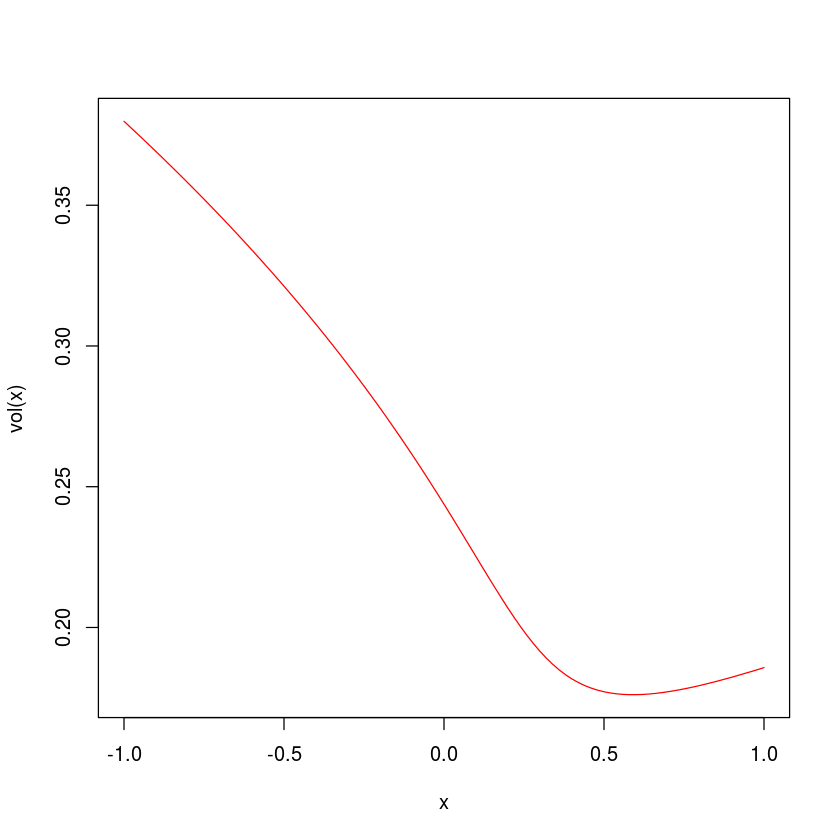

In [12]:
vol <- function(k){sapply(k,function(x){bsvol(phiHeston(subHeston),x,1)})}
curve(vol(x),from=-1,to=1,col="red")

### Another way to compute implied volatility

Equation [(6)](#eq:lewis) allows us to derive an elegant implicit expression
for the Black-Scholes implied volatility of an option in any model for
which the characteristic function is known.

Substituting the characteristic function for the Black-Scholes process
into [(6)](#eq:lewis) gives

$$
C_{BS}(S,K,T)=S-\sqrt{SK}\frac{1}{\pi}\int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}e^{-\frac{1}{2}\left(u^2+\frac{1}{4}\right)\sigma_{BS}^2
T }\right]
$$

Then, from the definition of implied volatility, we must have

<a name="eq:ImpliedFromFourier"></a>(7)
\begin{equation}
 \int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}\left(\phi_T\left(u-i/2\right)-e^{-\frac{1}{2}\left(u^2+\frac{1}{4}\right)\sigma_{BS}^2
T }\right)\right]=0
\end{equation}


* Equation [(7)](#eq:ImpliedFromFourier) gives us a simple but implicit relationship between the implied volatility surface and the characteristic function of the underlying stock process.

    * We may efficiently compute the structure of at-the-money implied volatility and the at-the-money volatility skew in terms of the characteristic function (at least numerically) without having to explicitly compute option prices.


* In practice, computing the option price and numerically inverting the Black-Scholes formula to get the implied volatility is faster.

### Computing the at-the-money volatility skew

Assume $\phi_T$ does not depend on spot $S$ and hence not on $k$. (This
is the case in all examples we have in mind.) Then differentiating
[(7)](#eq:ImpliedFromFourier) with respect to k and evaluating at $k=0$
gives 

$$
\int_0^\infty\,du \, \left\{ \frac{u\,
\mathrm{Im}\left[\phi_T(u-i/2) \right]}{u^2+\frac{1}{4}}
+\frac{1}{2}\,\left.\frac{\partial w_{BS} }{\partial k
}\right|_{k=0}\,e^{-\frac{1}{2}\left(u^2+\frac{1}{4}\right)w_{BS}(0,
T)}\right\}=0
$$

Integrating the second term explicitly we get

<a name="eq:skew"></a>(8)
\begin{equation}
\left.\frac{\partial \sigma_{BS} }{\partial k }\right|_{k=0}=-
e^{\frac{\sigma_{BS}^2 T}{8}} \sqrt{\frac{2}{ \pi}}\frac{1}{
\sqrt{T}}\,\int_0^\infty\,du \, \frac{u\,
\mathrm{Im}\left[\phi_T(u-i/2)\right]}
{u^2+\frac{1}{4}}
\end{equation}

### Example: Black-Scholes

In the Black-Scholes case, 

$$\mathrm{Im}\left[\phi_T(u-i/2)\right]
=\mathrm{Im}\left[e^{-\frac{1}{2}\left(u^2+1/4\right)\sigma^2 T
}\right]=0$$ 

Then 

$$\left.\frac{\partial \sigma_{BS}(k,T) }{\partial k
}\right|_{k=0}=0 \ \ \forall T>0.$$

### Example: Merton’s Jump-Diffusion Model (JD)

Write 

$$\phi_T(u) =e^{-\frac{1}{2}u(u+i)\sigma^2 T}\,e^{\psi(u) T}$$

with $\psi(u)=-\lambda i u \left(e^{\alpha
+\delta^2/2}-1\right)+\lambda\left( e^{i u \alpha -u^2
\delta^2/2}-1 \right)$

Then 

$$\mathrm{Im}\left[\phi_T(u-i/2)\right]
=e^{-\frac{1}{2}\left(u^2+\frac{1}{4}\right)\sigma^2
T}\,\mathrm{Im}\left[e^{\psi(u-i/2) T} \right]$$

### How jumps impact the volatility skew

By substituting the jump-diffusion characteristic function
[(5)](#eq:jumpdiffusioncharfn) into our expressions
[(7)](#eq:ImpliedFromFourier) and [(8)](#eq:skew) for the implied volatility and
ATM volatility skew respectively, we can investigate the impact of jumps
on the volatility surface for various numerical choices of the
parameters.

### Jump-diffusion parameter set for plots

<div align="center">Table 2: Parameters used to generate Figures 2 and 3.


$~~~~~~~~~$|$~~~~~~~~\sigma$|$~~~~~~~~\lambda$|$~~~~~~~~\alpha$|$~~~~~~~~\delta$
:------|------:|--------:|--------:|--------:
Solid| 0.2| 0.5 | -0.15 | 0.05
Dashed| 0.2 |1.0|-0.07|0.00
Long-dashed| 0.2 |1.0|-0.07|0.05

### Dependence of smile on jump parameters

Consider Merton's jump diffusion model, which has a well-known characteristic function.


In [13]:
# Parameters from Table 2.
paramsMJD1 <- list(sigma=0.2, lambdaJ = 0.5, alpha = -0.15, delta = .05)
paramsMJD2 <- list(sigma=0.2, lambdaJ = 1.0, alpha = -0.07, delta = .00)
paramsMJD3 <- list(sigma=0.2, lambdaJ = 1.0, alpha = -0.07, delta = .05)

phiMJD <- function(params){
    
    sigma <- params$sigma
    lambdaJ <- params$lambdaJ
    alpha <- params$alpha
    delta <- params$delta
    
    function(u, t){

    psiBS <- -u/2*(u+1i)*sigma^2
    psiJump <- lambdaJ*(-1i*u*(exp(alpha+delta^2/2)-1) + (exp(1i*u*alpha-u^2*delta^2/2)-1))
        
    return(exp((psiBS+psiJump)*t))
}
}

We now draw the 3-month smiles corresponding to these parameter sets:

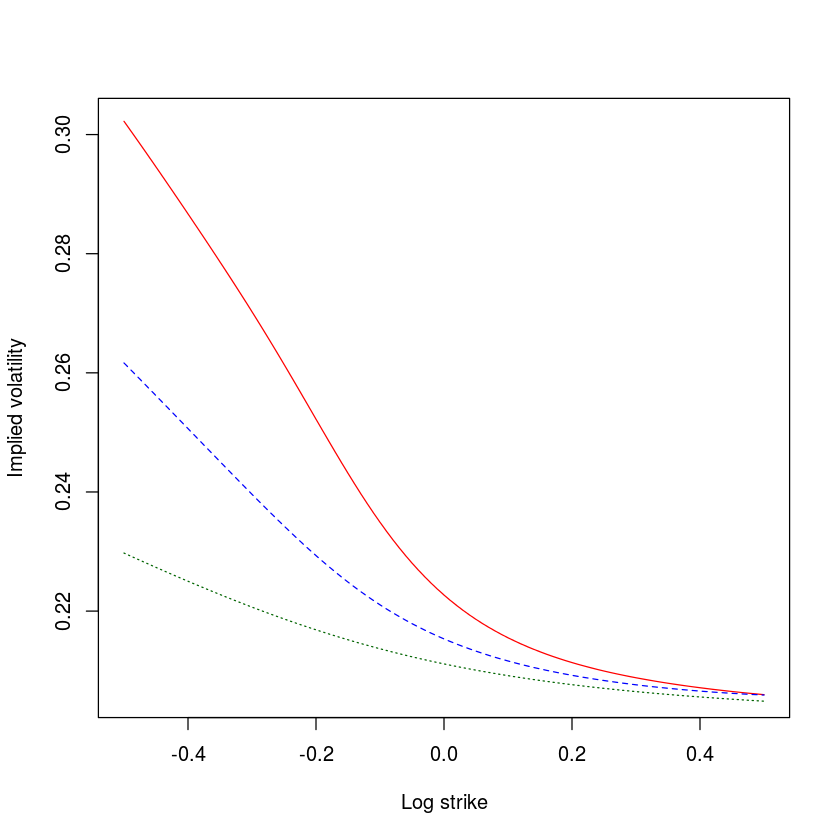

In [14]:
vol <- function(k){sapply(k,function(x){bsvol(phiMJD(paramsMJD1),x,.25)})}
curve(vol(x),from=-.5,to=.5,col="red",xlab="Log strike", ylab="Implied volatility")
vol <- function(k){sapply(k,function(x){bsvol(phiMJD(paramsMJD3),x,.25)})}
curve(vol(x),from=-.5,to=.5,col="blue",lty=2,add=T)
vol <- function(k){sapply(k,function(x){bsvol(phiMJD(paramsMJD2),x,.25)})}
curve(vol(x),from=-.5,to=.5,col="dark green",lty=3, add=T)

Figure 2: The 3 month volatility smile for various choices of jump-diffusion
parameters.

### Dependence of term structure of ATM skew on jump parameters

To explore the dependence of the ATM skew term structure on the jump parameters, we first build a function to compute the skew from the characteristic function.


In [15]:
atmSkew <- function(phi, t){
    atmVol <- BSImpliedVolCall(S0=1, K=1, T=t, r=0, C=callOption(phi, 0, t));
    integrand <-  function(u){Im(u*phi(u - 1i/2, t)/(u^2 + 1/4))};
    res <- -integrate(integrand,lower=0,upper=Inf,rel.tol=0.0000000001,subdivisions=1000)$value/sqrt(t)*sqrt(2/pi)*exp(atmVol^2*t/8);
    return(res);
}

atmVarSkew <- function(phi, t){
    volSkew <- atmSkew(phi,t);
    atmVol <- bsvol(phi,0,t);
    return(2*volSkew*atmVol);
}

# Vectorize the function
atmVarSkewV <- function(phi,tVec){sapply(tVec,function(t){atmVarSkew(phi,t)})};

Now plot the ATM skew term structure for the various MJD parameter sets.

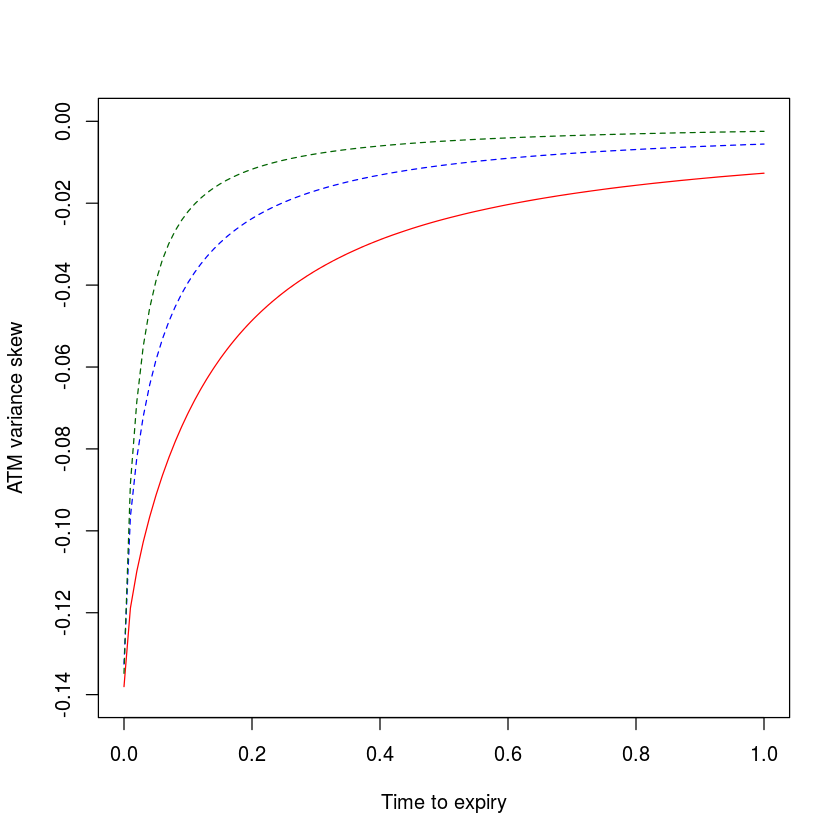

In [16]:
curve(atmVarSkewV(phiMJD(paramsMJD1),x),from=0.000001,to=1,col="red",xlab="Time to expiry", ylab="ATM variance skew",ylim=c(-.14,0))
curve(atmVarSkewV(phiMJD(paramsMJD3),x),from=0.000001,to=1,col="blue",lty=2,add=T)
curve(atmVarSkewV(phiMJD(paramsMJD2),x),from=0.000001,to=1,col="dark green",lty=2,add=T)

Figure 3: The term structure of ATM variance skew for various choices of jump-diffusion parameters.

### Skew behavior under jump-diffusion as $T\rightarrow 0$

Consider the value of an option under jump-diffusion with a short time
$\Delta T$ to expiration.

* Because the time to expiration is very short, the probability of having more than one jump is negligible.

* Because the jump is independent of the diffusion, the value of the option is just a superposition of the value conditional on the jump and the value conditional on no jump.

Without loss of generality, suppose the stock price jumps down from $S$ to $J\,S$ when the jump occurs.

Then

<a name="eq:jumpintuition"></a>(9)
\begin{eqnarray}
C_J(S,K,\Delta T)&\approx&(1-\lambda \Delta T)\,C_{BS}(S\, e^{\mu_J\,\Delta\, T} ,K,\Delta T)\nonumber\\
&&\quad\quad\quad+\lambda \Delta T \,
C_{BS}(J\,S\, e^{\mu_J\,\Delta\, T},K, \Delta T)\nonumber\\
&=&C_{BS}(S e^{\mu_J \Delta T},K,\Delta T) +O(\Delta
T)
\end{eqnarray} 

where $J$ is the size of the jump, $C_J(.)$ represents the value of the
option under jump diffusion and
$\mu_J$ is the jump compensator.

### ATM skew approximation

We want to compute the at-the-money variance skew

$$\left. \frac{\partial \sigma_{BS}^2}{\partial k}\right|_{k=0}$$ 

To do this note that

$$\frac{\partial C_J}{\partial k}= \frac{\partial C_{BS}}{\partial
k}+\frac{\partial C_{BS}}{\partial \sigma_{BS}}\frac{\partial
\sigma_{BS}}{\partial k}$$ 

so

$$\left. \frac{\partial \sigma_{BS}}{\partial
k}\right|_{k=0}=\left.\left[ \frac{\partial C_J}{\partial
k}-\frac{\partial C_{BS}}{\partial k}\right]\,\left(\frac{\partial
C_{BS}}{\sigma_{BS}}\right)^{-1}\right|_{k=0}$$

Now, for an at-the-money option,

$$\left.\frac{\partial
C_{BS}}{\sigma_{BS}}\right|_{k=0}\approx\frac{S}{\sqrt{2
\pi}}\sqrt{\Delta T}$$ 

and from equation [(9)](#eq:jumpintuition)

\begin{eqnarray*}
\frac{1}{S}\left.\left[ \frac{\partial C_J}{\partial
k}-\frac{\partial C_{BS}}{\partial
k}\right]\right|_{k=0}&\approx&-N\left(+\frac{\mu_J \Delta T
}{\sigma\sqrt{\Delta T}}-\frac{1}{2}\sigma\sqrt{\Delta
T}\right)\\&&+N\left(-\frac{1}{2}\sigma\sqrt{\Delta T}
\right)\\
&\approx&-\frac{1}{\sqrt{2 \pi}}\frac{\mu_J}{\sigma}\sqrt{\Delta
T}
\end{eqnarray*}

Then, for small $\Delta T$,

<a name="eq:timezeroskew"></a>(10)
$$\left. \frac{\partial \sigma_{BS}^2}{\partial
k}\right|_{k=0}\approx -2\,{\mu_J}$$

We see that in a jump-diffusion model, if the mean jump-size is
sufficiently large relative to its standard deviation, the at-the-money
variance skew is given directly by twice the jump compensator $\mu_J$.

### The decay of skew due to jumps

* We can see from Figure 3 that the volatility skew decays very rapidly in a jump-diffusion model beyond a certain time to expiration.


* To estimate this characteristic time, we note that prices of European options depend only on the final distribution of stock prices and if the jump size is of the order of only one standard deviation $\sigma \sqrt{T}$, a single jump has little impact on the shape of this distribution.

* We already saw that the $T \rightarrow 0$ skew is given by the jump compensator $\mu_J$. 

    * We can generate a given $\mu_J$ either with frequent small jumps or with infrequent big jumps.

    * If there are many small jumps, returns will be hard to distinguish from normal over a reasonable time interval.

    * On the other hand, if there are infrequent big jumps and time to expiration is sufficiently short, below some characteristic time $T^*$ say, we should be able to detect the presence of the jump in the final return distribution.

### Estimate of $T^\star$

* We estimate $T^*$ by equating 

    $$-\left(e^{\alpha+\delta^2/2}-1\right)\approx \sigma \sqrt{T^*}$$

* Figure 4 shows the terminal return distributions for various expirations corresponding to the solid-line parameters from Table 2: 
    
    $$\sigma=0.2;\,\lambda= 0.5;\,\alpha=   -0.15;\,\delta=   0.05.$$

<blockquote>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
The jump compensator (or expected move in the stock price due to jumps)
drives the skew in the short-expiration limit while the decay of ATM
skew is driven by the expected jump size.

<br>
<br>

</div>

</blockquote>


### JD density versus normal density

If we wait long enough, jumps become indinguishable *ex post* from moves due to diffusion.  To see this, we first build a function to compute the density from the characteristic function.


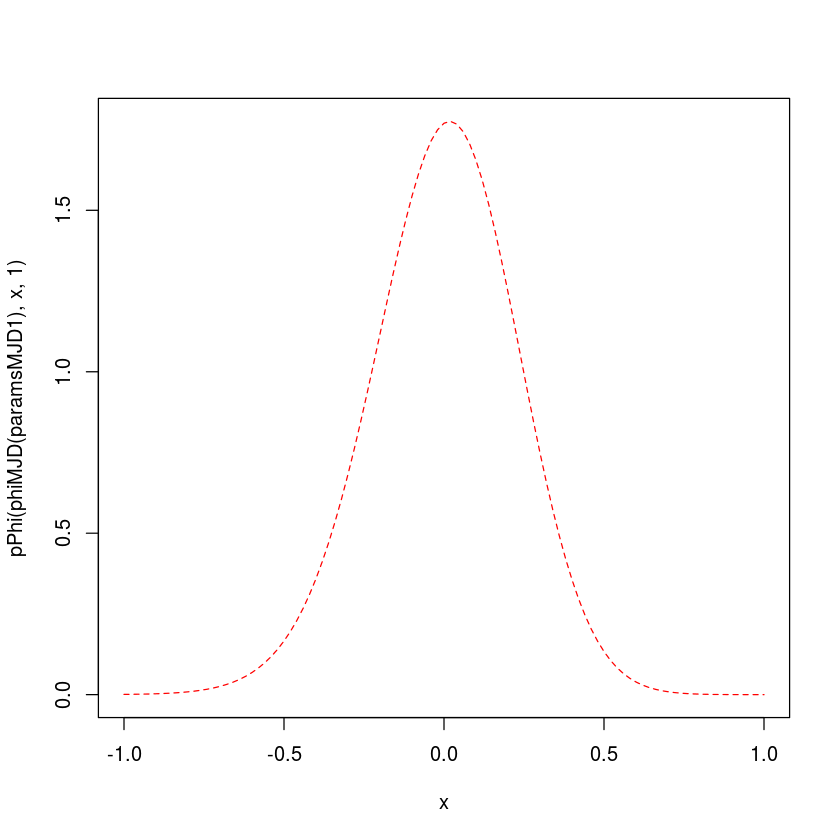

In [17]:
pPhi.raw <- function(phi,x,t){
    
    integrand <-  function(u){Re(exp(-1i*x*u)*phi(u - 1i/2, t))};
    res <- integrate(integrand,lower=0,upper=Inf,rel.tol=0.0000000001,subdivisions=1000)$value/pi;
    return(res);
}

# Vectorize the function
pPhi <- function(phi,xVec,t){sapply(xVec,function(x){pPhi.raw(phi,x,t)})};
curve(pPhi(phiMJD(paramsMJD1),x,1),from=-1,to=1,col="red", lty=2);

First compute means and standard deviations of the various distributions so we can superimpose the normal density.

In [18]:
# Compute means and standard deviations of distributions
pMean <- function(phi,t){integrate(function(x){pPhi(phi,x,t)*x},lower=-5,upper=5)$value}

m2 <- pMean(phiMJD(paramsMJD1),2/12)
m4 <- pMean(phiMJD(paramsMJD1),4/12)
m6 <- pMean(phiMJD(paramsMJD1),6/12)
m8 <- pMean(phiMJD(paramsMJD1),8/12)

pVar <- function(phi,t){integrate(function(x){pPhi(phi,x,t)*x^2},lower=-5,upper=5)$value}

s2 <- sqrt(pVar(phiMJD(paramsMJD1),2/12)-m2^2);
s4 <- sqrt(pVar(phiMJD(paramsMJD1),4/12)-m4^2);
s6 <- sqrt(pVar(phiMJD(paramsMJD1),6/12)-m6^2);
s8 <- sqrt(pVar(phiMJD(paramsMJD1),8/12)-m8^2);


We see that densities looks more Gaussian as time increases:

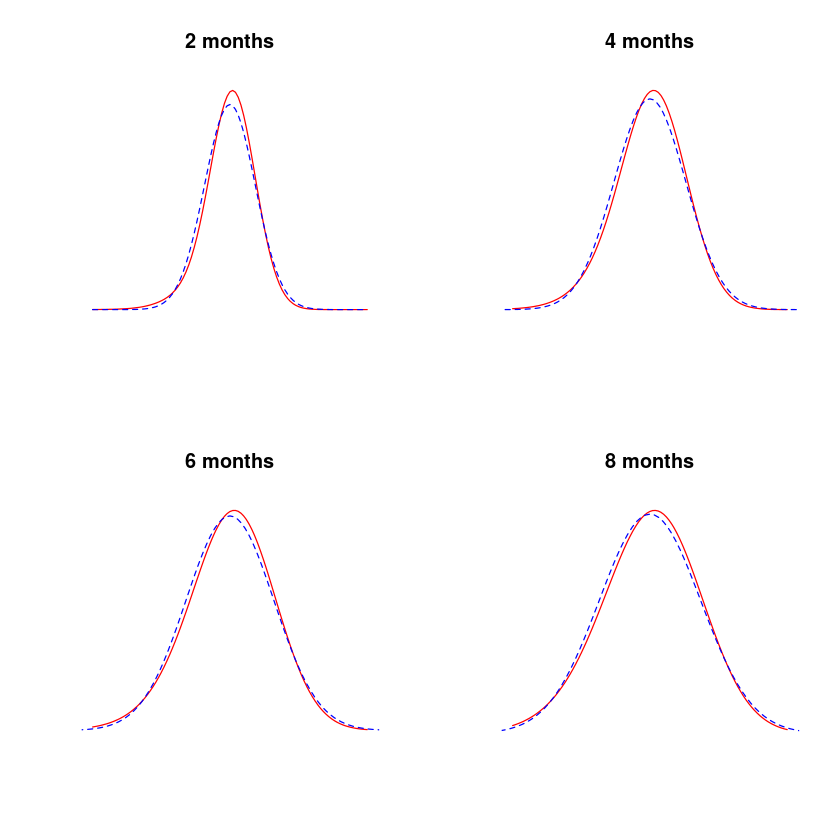

In [19]:
par(mfrow=c(2,2))
curve(pPhi(phiMJD(paramsMJD1),x,2/12),from=-.5,to=.5,col="red",xlab=NA,ylab=NA,yaxt="n",xaxt="n",frame.plot=F,main="2 months");
curve(dnorm(x,mean=m2,sd=s2),from=-.5,to=.5,col="blue",add=T,lty=2);
curve(pPhi(phiMJD(paramsMJD1),x,4/12),from=-.5,to=.5,col="red",xlab=NA,ylab=NA,yaxt="n",xaxt="n",frame.plot=F,main="4 months");
curve(dnorm(x,mean=m4,sd=s4),from=-.6,to=.6,col="blue",add=T,lty=2);
curve(pPhi(phiMJD(paramsMJD1),x,6/12),from=-.5,to=.5,col="red",xlab=NA,ylab=NA,yaxt="n",xaxt="n",frame.plot=F,main="6 months");
curve(dnorm(x,mean=m6,sd=s6),from=-.7,to=.7,col="blue",add=T,lty=2);
curve(pPhi(phiMJD(paramsMJD1),x,8/12),from=-.5,to=.5,col="red",xlab=NA,ylab=NA,yaxt="n",xaxt="n",frame.plot=F,main="8 months");
curve(dnorm(x,mean=m8,sd=s8),from=-.8,to=.8,col="blue",add=T,lty=2);
par(mfrow=c(1,1))

Figure 4: As time to expiration increases, the return distribution looks more
and more normal. The solid line is the jump-diffusion pdf and for
comparison, the dashed line is the normal density with the same mean and
standard deviation. With the parameters used to generate these plots,
the characteristic time $T^*=0.67$. 

### Time-zero skews and characteristic times

To see how well these approximate computations explain Figures
3 and 2, the characteristic time
$T^*$ and the time zero skew $\psi_0$, here is a table of parameters
used:

<div align="center">Table 3: Interpreting Figures 2 and 3

**Color**$~~~~~~~~~$|$~~~~~~~~\sigma$|$~~~~~~~~\lambda$|$~~~~~~~~\alpha$|$~~~~~~~~\delta$|**$~~~~~~~~T^*$**|$~~~~~~~~\psi_0$
:------|------:|--------:|--------:|--------:|--------:|--------:
Solid | 0.2| 0.5 | -0.15 | 0.05 | 0.69 | -0.133
Dashed| 0.2 |1.0| -0.07| 0.00| 0.34| -0.135
Long-dashed| 0.2 |1.0|-0.07|0.05|0.33|-0.133

### Default risk and the volatility smile

* We have seen that models with jumps can generate the extreme short-dated smiles that are observed empirically.


* In the single-stock case, there is a much more direct and obvious explanation for the volatility skew – default risk.


* In particular, if the credit spread (and so default risk) is high, implied volatility skews can be extreme.

### Default modeling

- There are two broad types of default-risk model used by practitioners: so-called *structural* models and so-called *reduced form* models.

- In a structural model, default occurs when some measure of equity (assets minus liabilities) hits a barrier (usually zero). The probability of default is then computed as the barrier hitting probability.

    - Hull and White and Creditgrades models are examples of structural models.

- In a reduced form model, there is some probability per unit time (the hazard rate) that default will occur and then equity goes to zero and bonds go to recovery value. These models are in general easier to calibrate but may exhibit less realistic dynamics.

     - The Duffie and Singleton model is an example of a reduced form model.

### Merton’s model of default

* The Merton jump-to-ruin (MJR) model is the simplest possible example of a reduced form model.


* It supposes that there some probability $\lambda(t)$ per unit time of the stock price jumping to zero (the *hazard rate*) whereupon default occurs.


* Jumps are independent of the stock price process.

### The valuation equation

* In the MJR model, contingent claims must satisfy the jump-diffusion valuation equation [(3)](#eq:genjumpdiffval) with $\mathbb{E}[J]=0$.


* It is particularly straightforward to value a call option because for a call, $V(SJ,t)=0$.

* Substitution into equation [(3)](#eq:genjumpdiffval) gives:

<a name="eq:mertonequation"></a>(11)
\begin{equation}
{\frac{{\partial V}}{{\partial t}}} + \frac{1}{2}\sigma^2\,S^2
\frac{{\partial ^2 V}}{{\partial S^2 }}  +r S {\frac{\partial
V}{\partial S}-r V} -\lambda(t)\left\{V - S \,\frac{{\partial
V}}{{\partial S }}\right\}=0.
\end{equation}

* We immediately recognize equation [(11)](#eq:mertonequation) as the Black-Scholes equation with a shifted interest rate $r+\lambda$.


* Its solution is of course the Black-Scholes formula with this shifted rate.

### Interpretation

* The meaning of this shifted rate is particularly clear if we assume no recovery (in the case of default) on the issuer’s bonds so that $B(JS,t)=0$.


* Then, the risky bond price $B(t,T)$ must also satisfy equation [(11)](#eq:mertonequation) with the solution 

$$B(t,T)=e^{-\int\limits_t^T (r(s)+\lambda(s)) ds}$$


* We identify the shifted rate $r+\lambda$ with the yield (risk-free rate plus credit spread) of a risky bond.

    * The situation is a little more complicated (but not too much more) if we allow some recovery $R$ on default.

### Intuition

* It may at first seem surprising that the Black-Scholes formula could be a solution of an equation that has a jump to zero (the so-called *jump to ruin*) in it. The economic reason is as follows:


* Suppose we replicate a short call option position using stock and risky bonds (rather than risk-free bonds).

    * So long as there is no jump to ruin, the derivation goes through as before and the portfolio is self-financing.

    * If there is a jump-to-ruin, assuming no recovery on the bond, both the bond and the stock jump to zero – the portfolio is still self-financing!

* Had we hedged with *risk-free* bonds, we would be long stock and short risk-free bonds and in the case of default, the call would end up worthless, the stock would be worthless and we would get full recovery on our risk-free bonds.

    * On default, we would have a windfall gain!

    * On the other hand, relative to hedging with risky bonds, we would forego the higher carry (or yield).

### Implications for the volatility skew

* All issuers of stock have some probability of defaulting.

    * There is a very active credit derivative market (see [DefaultRisk.com](http://defaultrisk.com) for background) which prices default-risk.

* Black-Scholes implied volatilities are computed by inserting the risk-free rate into the Black-Scholes formula.


* However, as we just showed, in Merton’s model, call option prices are correctly obtained by substituting the risky rate into the Black-Scholes formula.


* This induces a skew which can become extremely steep for short-dated options on stocks whose issuers have high credit spreads.

### MJR smile examples

We now examine the dependence of the smile on the credit spread in the Merton jump-to-ruin model.

In [20]:
cMJR <- function(S0, K, T, r, lambda, sigma){BSFormula(S0, K, T, r+lambda, sigma)};#lambda is hazard rate

# Fix spot=1, expiry = 3 months, vol = 20%, r=0 and play with credit spread
impVolMJR <- function(k,lambda){BSImpliedVolCall(1, K= exp(k), T=0.25, r=0, 
   cMJR(S0=1, K=exp(k), T=0.25, r=0, lambda, sigma=0.2))}

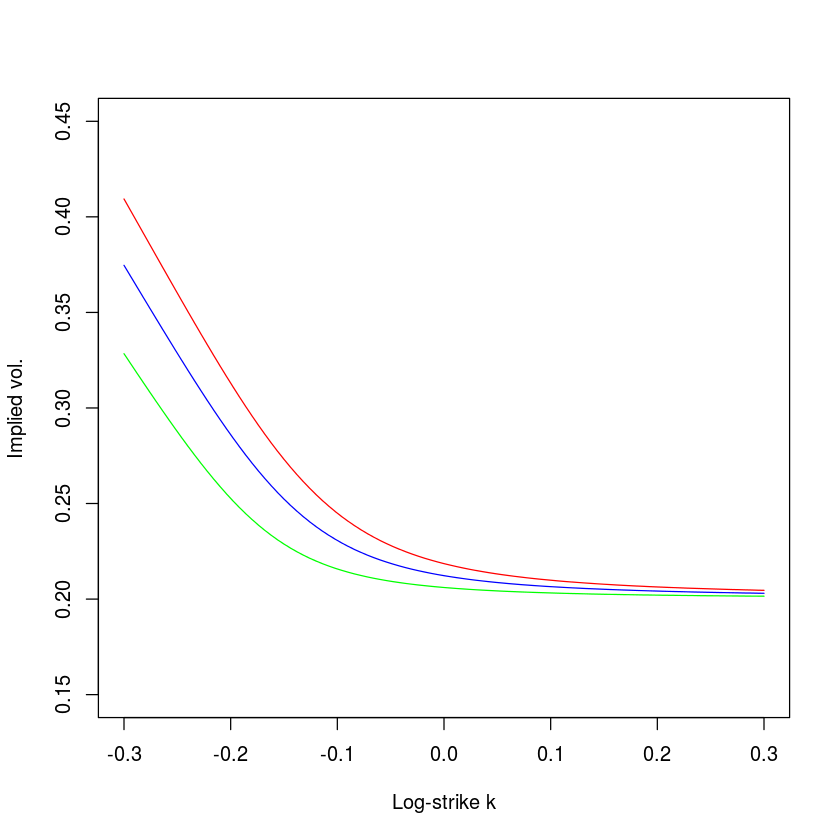

In [21]:
curve(impVolMJR(x,lambda=.03),from=-0.3,to=0.3,col="red",ylab="Implied vol.",xlab="Log-strike k",ylim=c(0.15,.45));
curve(impVolMJR(x,lambda=.02),from=-0.3,to=0.3,col="blue",add=T);
curve(impVolMJR(x,lambda=.01),from=-0.3,to=0.3,col="green",add=T);

Figure 5: 3 month implied volatilities from the Merton model assuming a stock
volatility of 20% and credit spreads of 100bp (green), 200bp (blue) and
300bp (red)

### Capital structure arbitrage

* The term *capital structure arbitrage* refers to trading of equity claims against fixed income and convertible claims.

    * At its most sophisticated, practitioners build elaborate models of the capital structure of a company to determine the relative values of the various claims – in particular, stock, bonds and convertible bonds.

    * At its simplest, the trader looks to see if equity puts are cheaper than credit derivatives and if so buys the one and sells the other.

### Put valuation

* In the MJR model, the value of a call option is given by the Black-Scholes formula with the risk-free rate replaced by the risky-rate. What about put options?


* The value of a put depends on who the writer is.

    * If the writer is the issuer of the stock, assuming zero recovery, the put will be worth nothing if default occurs.

    * If the writer is a default-free counterparty (for example an exchange), when default occurs, the put option should be worth the strike price.

* We already know how to value a call written by a default-free counterparty

    * An issuer cannot default on a call on his own stock so the value of a call written by the issuer of the stock equals the value of a call written by a default-free counterparty.


* We obtain the value of a put using put-call parity

    * using risk-free bonds in the case of the default-free counterparty and risky bonds in the case of the risky counterparty.

### Put-call parity

Denoting the value of a risk-free put, call and bond by $P_0$,$C_0$ and
$B_0$ and the value of risky claims on the issuer of the stock by $P_I$,
$C_I$ and $B_I$ (I for issuer), we obtain

<a name="eq:putCallParity"></a>(12)
\begin{eqnarray}
P_0&=&C_0 +K B_0 -S \text{ (from put-call parity with risk-free bonds)}\nonumber\\
 &=&C_I+K B_0 -S \text{ (risk-free calls =  issuer-written calls)}\nonumber\\
&=&P_I+S-K B_I+K B_0 -S \text{ (from put-call parity with risky bonds)}\nonumber\\
&=&P_I+K\, (B_0-B_I)
\end{eqnarray}

* The risk-free put is worth more than the risky put.

* The excess in value is equal to the difference between risky and risk-free bond prices (times the strike price).

### Relationship with default swaps

* With maturity-independent rates and credit spreads for clarity and setting $t=0$, we obtain

    $$B_0-B_I=e^{-r T} \left(1-e^{-\lambda T}\right)$$ 

    which is just the discounted probability of default in the Merton model.


* In words, the extra value is the strike price times the (pseudo-) probability that default occurs.


* This payoff is also more or less exactly the payoff of a default put in the credit derivatives market.

### Arbitrage: A sad but true story

* From Figure 5, we see that the downside implied volatility skew can be extreme for stocks whose issuers have high credit spreads.


* Equity option market makers used to make do with heuristic rules to determine whether a skew looked reasonable or not; implied volatility skews of the magnitude shown in Figure 5 seemed just too extreme to be considered reasonable.

* Taking advantage of the market maker’s lack of understanding, the trader buys an equity option on the exchange at a “very high” (but of course insufficiently high) implied volatility and sells a default put on the same stock in the credit derivatives market locking in a risk-free return.

* Ultimately, skews got so steep that the hedge funds made money risk-free the other way round – through put spreads.


* For example, buy one at-the-money put and sell two puts struck at half the current stock price.

    * This strategy has only positive payoffs so if this can be traded flat or for a net credit, it is a pure arbitrage.

### The payoff of 1x2 put spread

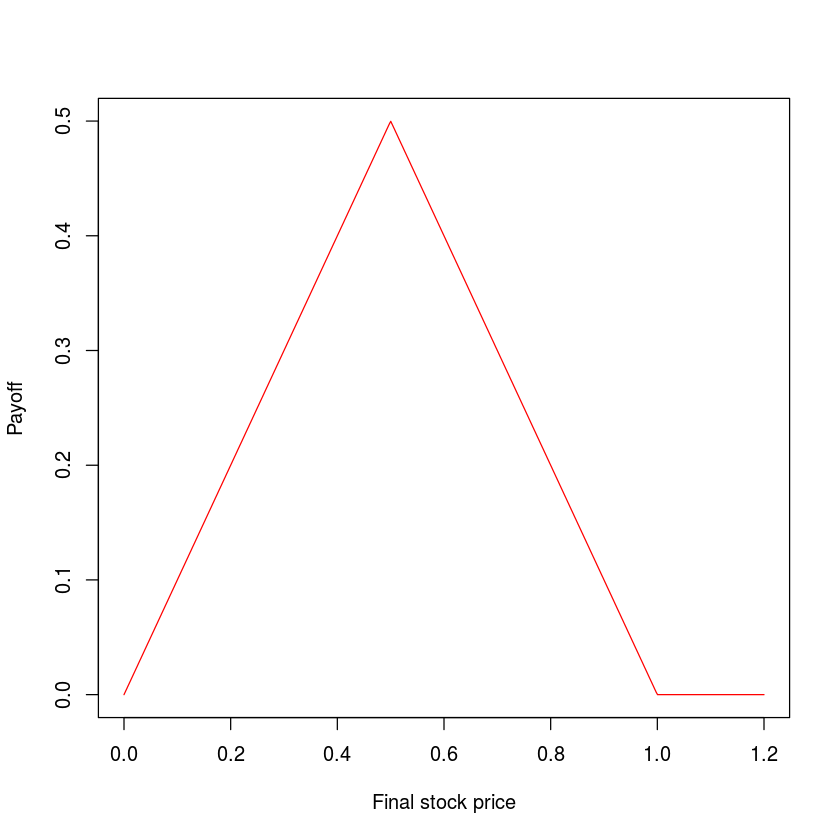

In [22]:
put100 <- function(s){(s<=1)*(1-s)}
put50 <- function(s){(s<=.5)*(1/2-s)}
putSpread1x2 <- function(s){put100(s)-2*put50(s)}

curve(putSpread1x2(x),from=0,to=1.2,col="red",xlab="Final stock price",ylab="Payoff",n=500)

Figure 6: Payoff of the 1x2 put spread combination: buy one put with strike 1.0 and sell two puts with strike 0.5

### Arbitrage bounds as a function of credit spread

* As in Table 4,

    * there is a lower bound to the price of a put from the the credit default swap market

    * and an upper bound from spread arbitrage.

<div align="center">Table 4: Upper and lower arbitrage bounds for one year 0.5 strike options for
various credit spreads (at-the-money volatility is 20%)
<p>

**Credit spread (bp)**$~~~~~$|$~~~~$**Lower bound**|$~~~~$**Upper bound**
:------|------:|--------:
250 | 0.0123 | 0.0398
500 | 0.0244 | 0.0398
750 | 0.0361 | 0.0398

### Discussion

* Assuming $20\%$ at-the-money volatility, the upper bound is computed as half the value of an at-the-money option which is $0.0398$ in each case.


* On the other hand, the lower bounds are just the present value of the strike price times the probability of default.


* The lower bound increases steadily towards the upper bound as the credit spread increases *for fixed at-the-money implied volatility*.


* It’s easy to see how a market maker could have exceeded the upper bound given the steady increase in skews.

### Summary

- We motivated the introduction of jumps to explained observed short-dated smiles.
    - For trsctability, such jumps are assumed independent; they add an extra factor in the characteristic function.


- We saw how easy it is to generate the volatility surface for models with closed-form characteristic functions.


- We got intuition for how jumps affect both the short-dated ATM skew in the limit $T \to 0$ and the decay of skew.


- We saw how single stock option downside skews are dominated by the credit spread of the underlying.

### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-CarrMadan"><span class="mw-cite-backlink"><b><a href="#cite_ref-CarrMadan">^</a></b></span> Peter Carr and Dilip Madan, Option valuation using the Fast Fourier Transform, <span>*Journal of Computational Finance*</span> <span>**2**</span>(4), 61–73 (1999).</li>

  <li id="cite_note-Gatheral"><span class="mw-cite-backlink"><b><a href="#cite_ref-Gatheral">^</a></b></span>   Jim Gatheral,  <span>*The Volatility Surface: A Practitioner's Guide*</span>, John Wiley and Sons, Hoboken, NJ (2006).</li>

  <li id="cite_note-Lewis"><span class="mw-cite-backlink"><b><a href="#cite_ref-Lewis">^</a></b></span>   Alan L. Lewis,  <span>*Option Valuation under Stochastic Volatility with Mathematica Code*</span>, Finance Press: Newport Beach, CA (2000).</li>
  
  <li id="cite_note-Wilmott"><span class="mw-cite-backlink"><b><a href="#cite_ref-Wilmott">^</a></b></span>   Paul Wilmott, <span>*Paul Wilmott Introduces Quantitative Finance*</span>, John Wiley and Sons, Chichester (2007).</li>
  
</ol>